# Course: Deep Learning
# Author: Sandro Camargo <sandrocamargo@unipampa.edu.br>
# Non Linear Regression with Multi Layer Perceptron Example
# Overfitting Example 
# Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

In [ ]:
# Import Libraries
import keras # Neural Network Library
import pandas as pd # Data Manipulation library
import numpy as np # Fast Numeric Computing library
import tensorflow as tf # Optimizers
import matplotlib.pyplot as plt # Plot library
from keras import layers # Layers to a neural network

In [ ]:
# Loading dataset
colnames=['Crim','Zn','Indus','Chas','Nox','Rm','Age','Dis','Rad','Tax','PtRatio','B','Lstat','MedV']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', sep="\s+", header=None, names=colnames)

# inspecting columns and data types from "data" dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Crim     506 non-null    float64
 1   Zn       506 non-null    float64
 2   Indus    506 non-null    float64
 3   Chas     506 non-null    int64  
 4   Nox      506 non-null    float64
 5   Rm       506 non-null    float64
 6   Age      506 non-null    float64
 7   Dis      506 non-null    float64
 8   Rad      506 non-null    int64  
 9   Tax      506 non-null    float64
 10  PtRatio  506 non-null    float64
 11  B        506 non-null    float64
 12  Lstat    506 non-null    float64
 13  MedV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# Descriptive Statistics
data.describe()

,Crim,Zn,Indus,Chas,Nox,Rm,Age,Dis,Rad,Tax,PtRatio,B,Lstat,MedV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Split inputs and outputs
output = data['MedV']
inputs = data
inputs.drop(inputs.columns[[13]], axis=1, inplace=True) # column 13 is removed, because it is the output (y)

In [ ]:
# Defining normalizing function 
def normalize(dataset):
  mu = np.mean(dataset, axis = 0)
  sigma = np.std(dataset, axis = 0)
  return (dataset - mu)/sigma

In [ ]:
inputs_norm = normalize(inputs)

np.random.seed(1) # Random numbers will be ever the same
rnd = np.random.rand(len(inputs_norm)) < 0.8 # Training set will contain 80% of the data

# Creating the training dataset (80%)
train_x = inputs_norm[rnd]
train_y = output[rnd]

# Creating the validation dataset (20%)
val_x = inputs_norm[~rnd]
val_y = output[~rnd]

# Verifying dataset dimensions
print('The training dataset (inputs) dimensions are: ', train_x.shape)
print('The training dataset (outputs) dimensions are: ', train_y.shape)
print('The validation dataset (inputs) dimensions are: ', val_x.shape)
print('The validation dataset (outputs) dimensions are: ', val_y.shape)

The training dataset (inputs) dimensions are:  (395, 13)
The training dataset (outputs) dimensions are:  (395,)
The validation dataset (inputs) dimensions are:  (111, 13)
The validation dataset (outputs) dimensions are:  (111,)


In [ ]:
def create_and_train_model_nlayers(data_train_norm, labels_train, data_val_norm, labels_val, num_neurons, num_layers):
  # build model
  # input layer
  inputs = keras.Input(shape = data_train_norm.shape[1])
  # he initialization
  initializer = tf.keras.initializers.HeNormal()
  # first hidden layer
  dense = layers.Dense(num_neurons, activation = 'relu', kernel_initializer = initializer)(inputs)
  # customized number of layers and neurons per layer
  for i in range(num_layers - 1):
    dense = layers.Dense(num_neurons, activation = 'relu', kernel_initializer = initializer)(dense)

  # output layer
  outputs = layers.Dense(1)(dense)
  model = keras.Model(inputs = inputs, outputs = outputs, name = 'model')
  # set optimizer and loss
  opt = keras.optimizers.Adam(learning_rate = 0.001)
  model.compile(loss = 'mse', optimizer = opt, metrics = ['mse','mae'])
  # train model
  history = model.fit(
    data_train_norm, labels_train,
    epochs = 10000, verbose = 1,
    batch_size = data_train_norm.shape[0],
    validation_data = (data_val_norm, labels_val))
  # save performances
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  return hist, model

In [ ]:
hist, model = create_and_train_model_nlayers(train_x, train_y, val_x, val_y, 20, 4)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 39ms/step - loss: 0.0551 - mse: 0.0551 - mae: 0.0981 - val_loss: 24.2833 - val_mse: 24.2833 - val_mae: 3.0578
Epoch 7502/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0554 - mse: 0.0554 - mae: 0.0998 - val_loss: 24.4225 - val_mse: 24.4225 - val_mae: 3.0698
Epoch 7503/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0558 - mse: 0.0558 - mae: 0.1021 - val_loss: 24.2401 - val_mse: 24.2401 - val_mae: 3.0543
Epoch 7504/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0561 - mse: 0.0561 - mae: 0.1036 - val_loss: 24.4248 - val_mse: 24.4248 - val_mae: 3.0706
Epoch 7505/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0564 - mse: 0.0564 - mae: 0.1076 - val_loss: 24.2517 - val_mse: 24.2517 - val_mae: 3.0553
Epoch 7506/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0569 - mse: 0.0569 - mae: 0.1075 - val_los

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,561
Trainable params: 1,561
Non-trainable par

This plot should be generated just to inspect the learning convergence. 
It is expected a decreasing of the loss function value through the epochs.

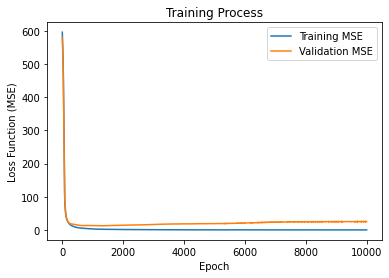

In [ ]:
plt.plot(hist['mse'], label="Training MSE")
plt.plot(hist['val_mse'], label="Validation MSE")
plt.title('Training Process')
plt.ylabel('Loss Function (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.savefig("mlp-regr-regularization.png")
plt.show()

Similar to the previous plot, but highlighting the divergence between training and validation sets

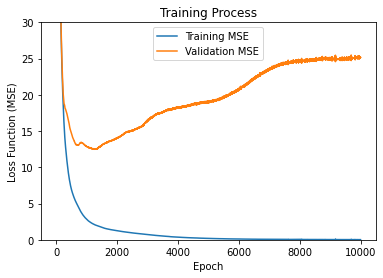

In [ ]:
plt.plot(hist['mse'], label="Training MSE")
plt.plot(hist['val_mse'], label="Validation MSE")
plt.ylim(0,30)
plt.title('Training Process')
plt.ylabel('Loss Function (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper center')
plt.savefig("mlp-regr-regularization-zoom.png")
plt.show()

4/4 [==============================] - 0s 3ms/step


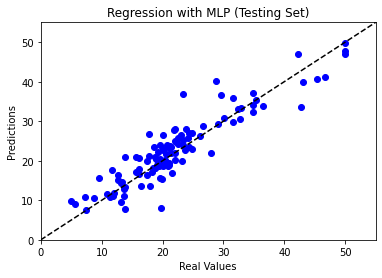

Correlation Coefficient in testing set: 0.8669


In [ ]:
test_predictions = model.predict(val_x) # predict radon activities with the built linear regression model

plt.scatter(val_y, test_predictions, marker = 'o', c = 'blue')
plt.plot([0,55], [0,55], color = 'black', ls = '--')
plt.ylabel('Predictions')
plt.xlabel('Real Values')
plt.title('Regression with MLP (Testing Set)')
plt.ylim(0, 55)
plt.xlim(0, 55)
plt.axis(True)
plt.savefig("mlp-regr-regul-testing.png")
plt.show()

print("Correlation Coefficient in testing set: %.4f" % np.corrcoef(np.transpose(test_predictions), np.transpose(val_y))[0,1])

13/13 [==============================] - 0s 3ms/step


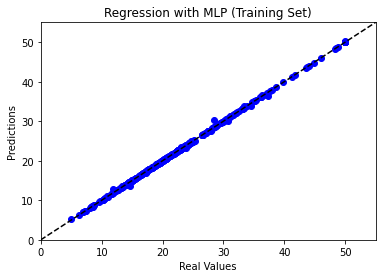

Correlation Coefficient in training set: 0.9999


In [ ]:
train_predictions = model.predict(train_x) # predict radom activities with the built linear regression model

plt.scatter(train_y, train_predictions, marker = 'o', c = 'blue')
plt.plot([0,55], [0,55], color = 'black', ls = '--')
plt.ylabel('Predictions')
plt.xlabel('Real Values')
plt.title('Regression with MLP (Training Set)')
plt.ylim(0, 55)
plt.xlim(0, 55)
plt.axis(True)
plt.savefig("mlp-regr-regul-training.png")
plt.show()

print("Correlation Coefficient in training set: %.4f" % np.corrcoef(np.transpose(train_predictions), np.transpose(train_y))[0,1])